In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv("/content/drive/My Drive/data_clean.csv")



In [30]:
df1 = df[df["Severity"]==1]
df2 = df[df["Severity"]==2]
df3 = df[df["Severity"]==3]
df4 = df[df["Severity"]==4]
df1.info()
df2.info()
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28178 entries, 237384 to 1018322
Columns: 140 entries, Unnamed: 0 to Wintry Mix / Windy
dtypes: float64(7), int64(131), object(2)
memory usage: 30.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212382 entries, 1 to 1516063
Columns: 140 entries, Unnamed: 0 to Wintry Mix / Windy
dtypes: float64(7), int64(131), object(2)
memory usage: 1.3+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161052 entries, 0 to 1516029
Columns: 140 entries, Unnamed: 0 to Wintry Mix / Windy
dtypes: float64(7), int64(131), object(2)
memory usage: 173.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114452 entries, 21 to 1516050
Columns: 140 entries, Unnamed: 0 to Wintry Mix / Windy
dtypes: float64(7), int64(131), object(2)
memory usage: 123.1+ MB


In [38]:
# df.head()
# df_sev_2 = df[df["Severity"]==2].sample(12000)
df = df.drop(df[df["Severity"]==2].index)
df = df.drop(df[df["Severity"]==1].index)

from sklearn.utils import resample
# downsampling severity = 2
df2 = resample(df2, 
        replace=False,    # sample without replacement
        n_samples=130000,     # to match minority class
        random_state=123) # reproducible results
# upsampling severity = 1
df1 = resample(df1, 
        replace=True,     # sample with replacement
        n_samples=130000,    # to match majority class
        random_state=123) # reproducible results

df = df.append(df1)
df = df.append(df2)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535504 entries, 0 to 752394
Columns: 140 entries, Unnamed: 0 to Wintry Mix / Windy
dtypes: float64(7), int64(131), object(2)
memory usage: 576.1+ MB


In [40]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Weekday']= df['Start_Time'].dt.weekday
df ['Month'] = df['Start_Time'].dt.month
df ['Hour'] = df['Start_Time'].dt.hour
# df.loc[:4,['Start_Time','Year','Month', 'Weekday', 'Hour']]

In [41]:
feature_lst=[ 'Severity','Start_Lat','Start_Lng','Weekday','Month','Hour', 'Zipcode', 'Temperature(F)', 'Humidity(%)','Visibility(mi)','Junction','Rain','Fog']

df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535504 entries, 0 to 752394
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Severity        535504 non-null  int64  
 1   Start_Lat       535504 non-null  float64
 2   Start_Lng       535504 non-null  float64
 3   Weekday         535504 non-null  int64  
 4   Month           535504 non-null  int64  
 5   Hour            535504 non-null  int64  
 6   Zipcode         535209 non-null  float64
 7   Temperature(F)  523682 non-null  float64
 8   Humidity(%)     522972 non-null  float64
 9   Visibility(mi)  522364 non-null  float64
 10  Junction        535504 non-null  int64  
 11  Rain            535504 non-null  int64  
 12  Fog             535504 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 57.2 MB


In [42]:
# method 1: remove rows with null value (if want to test with null, comment this cell)
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(519810, 13)

In [43]:
# Assign the data
df=df_sel

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [45]:

# Random Forest algorithm

#Create a RF Classifier
clf=RandomForestClassifier(n_estimators=100)

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.784.


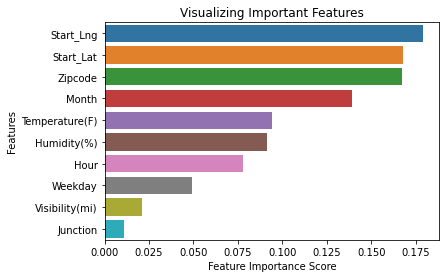

In [46]:
import seaborn as sns

#define Feature importance
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# plt.legend()
plt.show()

In [47]:
k=10
feature_imp.sort_values(ascending=False)[:k]

Start_Lng         0.179320
Start_Lat         0.167895
Zipcode           0.167126
Month             0.139083
Temperature(F)    0.094245
Humidity(%)       0.091074
Hour              0.077920
Weekday           0.048942
Visibility(mi)    0.020937
Junction          0.011029
dtype: float64

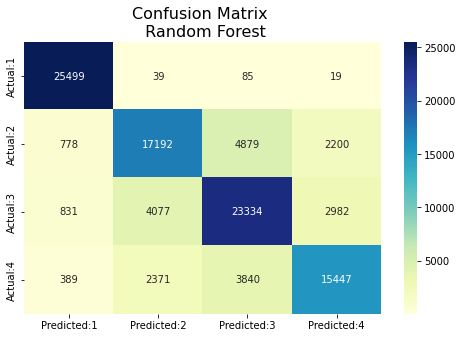

In [48]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4'],index=['Actual:1','Actual:2','Actual:3','Actual:4'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()